In [1]:
def cmpr_feature_vect(feature_vector1,feature_vector2):
    
    dist = (abs(feature_vector1**2 - feature_vector2**2))**(0.5)

    for idx, val in enumerate(dist):
        if np.isnan(val):
            dist[idx] = 0

    dist = np.sum(dist)

    return dist

In [3]:
from scipy.io import loadmat
import os

dataDir = "/home/dunga/Desktop/AutoSIGN_Related_Stuff/test_train/mat_files_CEDAR/"
mats = []
strings = []
for file in os.listdir( dataDir ) :
    strings.append(str(file))
    mats.append( loadmat( dataDir+file ) )
    
    
from sets import Set

string_set = Set()

for string in strings:
    print(string)
    string_set.add(string)

real_51.mat
real_25.mat
real_10.mat
forg_47.mat
real_20.mat
real_27.mat
forg_37.mat
forg_46.mat
real_53.mat
forg_29.mat
forg_1.mat
forg_19.mat
forg_42.mat
real_36.mat
forg_2.mat
forg_25.mat
real_45.mat
forg_4.mat
real_38.mat
forg_13.mat
real_43.mat
forg_53.mat
real_14.mat
real_1.mat
real_4.mat
real_24.mat
forg_27.mat
forg_31.mat
real_7.mat
forg_49.mat
forg_17.mat
real_30.mat
forg_40.mat
real_16.mat
forg_43.mat
real_54.mat
real_5.mat
forg_50.mat
real_52.mat
real_12.mat
forg_28.mat
forg_45.mat
forg_6.mat
forg_55.mat
forg_35.mat
real_48.mat
real_18.mat
real_28.mat
real_33.mat
forg_12.mat
real_37.mat
real_23.mat
forg_5.mat
forg_23.mat
forg_44.mat
real_47.mat
real_21.mat
forg_15.mat
real_35.mat
forg_10.mat
real_46.mat
real_13.mat
real_11.mat
real_22.mat
forg_48.mat
forg_32.mat
forg_9.mat
forg_22.mat
real_40.mat
forg_21.mat
real_50.mat
real_9.mat
real_44.mat
forg_51.mat
real_32.mat
real_41.mat
forg_24.mat
forg_54.mat
real_15.mat
forg_20.mat
forg_30.mat
real_2.mat
forg_34.mat
real_39.mat
real

/home/dunga/anaconda3/envs/AutoSIGN/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: the sets module is deprecated
  if sys.path[0] == '':


In [10]:
from scipy.io import loadmat
import numpy as np

real_mat = np.zeros((55,24,2048))
forg_mat = np.zeros((55,24,2048))

for index in range(1,55):
    
    str_real = 'real'
    str_forg = 'forg'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    forg_name = name_string.format(str_forg,index)
    
    features_real = loadmat(dataDir+real_name)['features']
    features_forg = loadmat(dataDir+forg_name)['features']
        
    real_mat[index] = features_real
    forg_mat[index] = features_forg

In [12]:
distance_forg = []

for index in range (1,55):
        print(index)
        for index_2 in range(1,24):
            for index_3 in range(1,24):   
                dist = cmpr_feature_vect(forg_mat[index][index_3],real_mat[index][index_2])
                distance_forg.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [13]:
distance_same = []

for index in range (1,55):
        print(index)
        for index_2 in range(1,24):
            for index_3 in range(1,24):
                if (index_2!=index_3):
                    dist = cmpr_feature_vect(real_mat[index][index_3],real_mat[index][index_2])
                    distance_same.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [14]:
np.shape(distance_same)
dist_same = np.array(distance_same)
print(dist_same.max())
print(dist_same.min())
print(dist_same.mean())
print(dist_same.std())

1647.32394353
314.792956617
812.258603281
137.469603255


In [15]:
np.shape(distance_forg)
dist_forg = np.array(distance_forg)
print(dist_forg.max())
print(dist_forg.min())
print(dist_forg.mean())
print(dist_forg.std())

2043.56183277
634.215013773
1143.63005437
227.6265486


In [18]:
distance_diff = []

for index in range (1,55):
    print(index)
    for index_2 in range(1,55):
        if (index_2!=index):
                    
            num = np.random.randint(1,24,2)
                    
            dist = cmpr_feature_vect(real_mat[index][num[0]],real_mat[index_2][num[1]])
            distance_diff.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [19]:
np.shape(distance_diff)
dist_diff = np.array(distance_diff)
print(dist_diff.max())
print(dist_diff.min())
print(dist_diff.mean())
print(dist_diff.std())

2097.62194746
845.054606103
1357.92052443
186.867337898


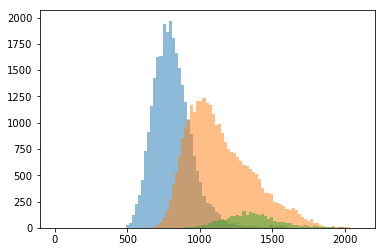

In [25]:
import numpy
import matplotlib.pyplot as plt

histogram=plt.figure()

bins = numpy.linspace(0, 2100, 100)

plt.hist(dist_same, bins, alpha=0.5)
plt.hist(dist_forg, bins, alpha=0.5)
plt.hist(dist_diff, bins, alpha=0.5)
plt.show()
